##**Description**

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

##**Importing necessary libraries**

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import chi2
from scipy.stats import chi2_contingency

##**Importing the DataSet**

In [46]:
df = pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [47]:
df = df.rename(columns={'fnlwgt': 'final-wt'})


In [48]:
df.head(2)

,age,workclass,final-wt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [49]:
df.describe()

,age,final-wt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   final-wt         48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# EDA

In [51]:
# Separating categorical and numerical features
cat_data = df.select_dtypes(exclude=[np.number, np.datetime64])
num_data = df.select_dtypes(exclude=[np.object, np.datetime64])


## Univariate Analysis

### Histograms for Numerical variables

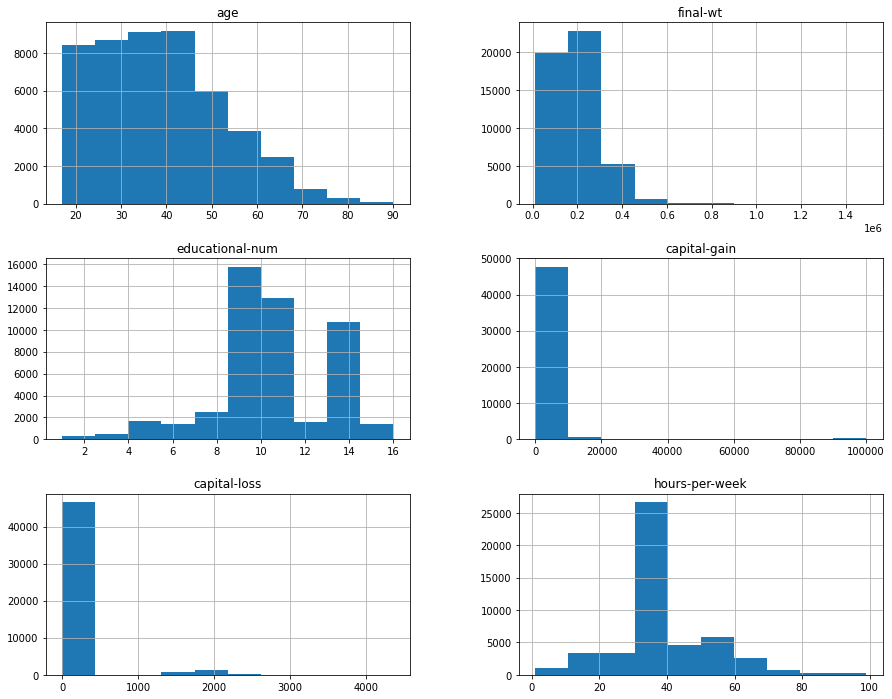

In [52]:
# Plotting histograms for numerical variables.
subset = df[num_data.columns]
subset.hist(figsize=(15,12))
plt.show()

**Observation**:
- People generally spend 30-40 hrs per week on their work.
- And majority of people has the age of 35 - 45 yrs.

### Boxplots for Numerical Variables

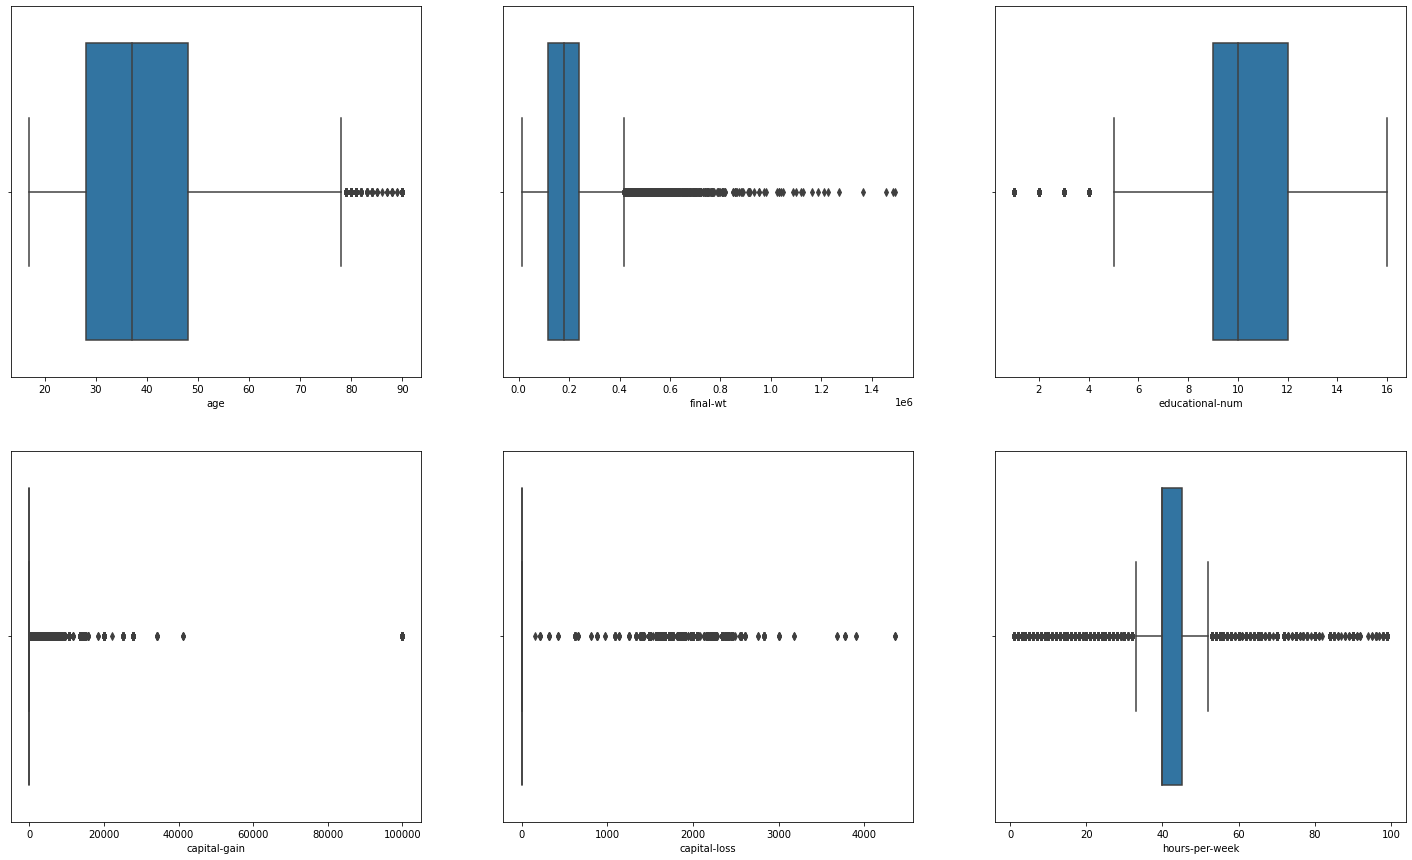

In [53]:

plt.subplots(figsize=(25, 15))
count = 1
for i in num_data.columns:
    plt.subplot(2, 3, count)
    sns.boxplot(x=df[i])
    count += 1
plt.show()

**Observation**:
- Their are outliers in the dataset.
- 75% of people's age lie below 48 yrs, capital-gain & loss are 0 and hours spent per week is below 45.
- 25% of people's age are below 28 yrs, and hours spent per week is below 40.

### Categorical Variables

In [54]:
cat_data.head(3)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K


### Frequency distribution of Categorical variables

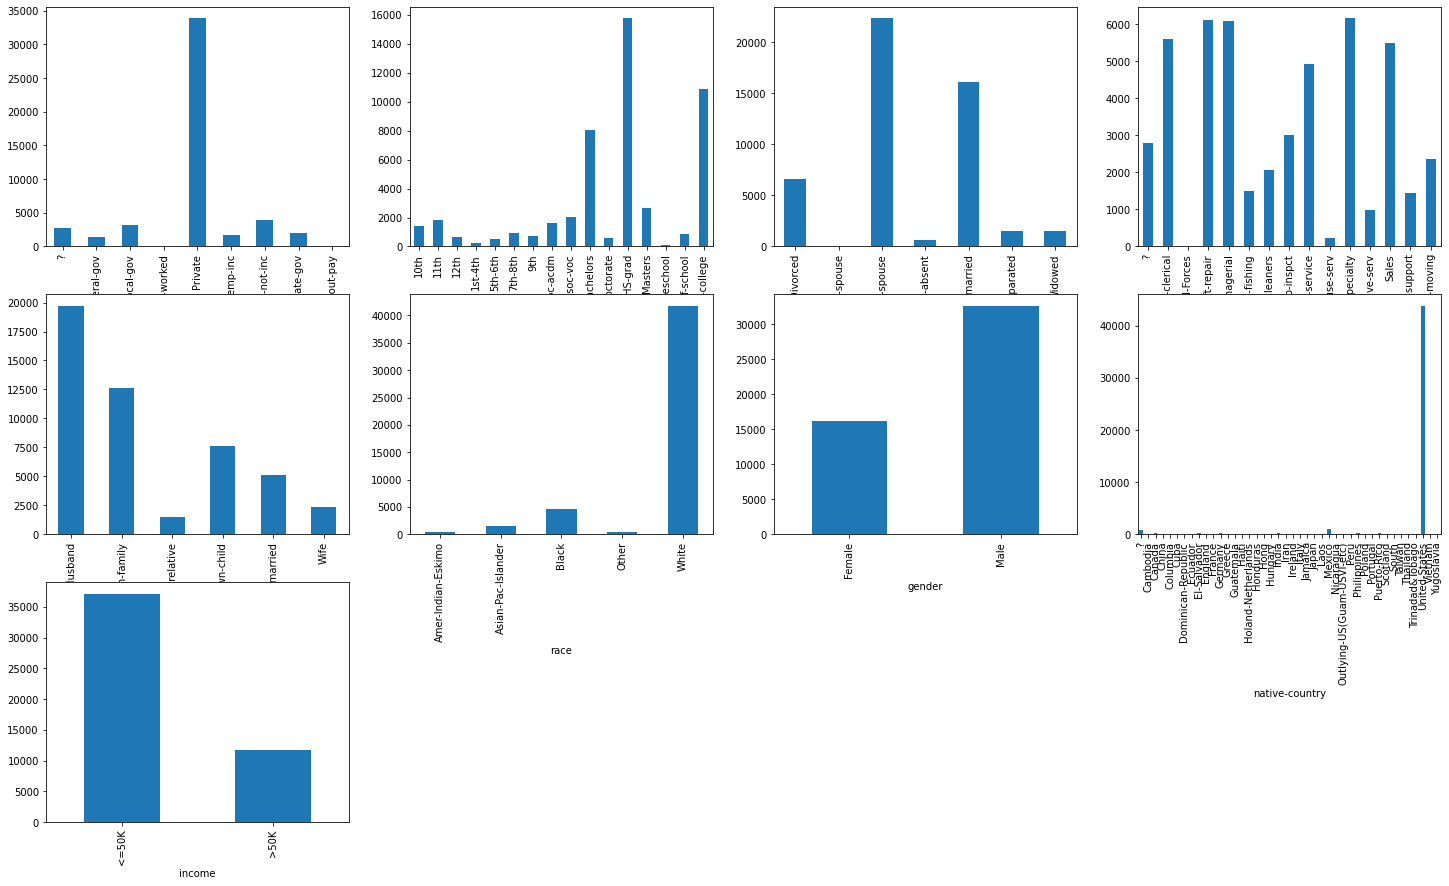

In [55]:
count = 1
plt.subplots(figsize=(25, 15))
for i in cat_data.columns:
    plt.subplot(3,4,count)
    cat_data.groupby(i).size().plot.bar()
    count +=1

plt.show()
    


**Observation**:
- Number of people working in *private* sector is highest.
- Majority are HS-graduates, and has some college degree.
- majority of them are either married with a civilian spouce or unmarried.
- There are more number of white people. Location of data collection might be one of the main reason for this variation.
- There are more number of males than females. This hints the preference of job categories based on gender.
- Nearly all the candidates are from US. This highlights the reason behind more number of whites than other races.
- And majority of people has salary less than 50 thousands.

### Heatmap

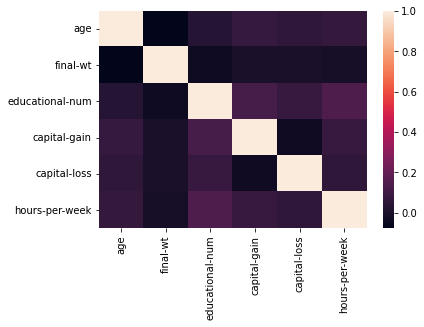

In [56]:
sns.heatmap(data=num_data.corr())

## Bivariate Analysis

### Pairplot

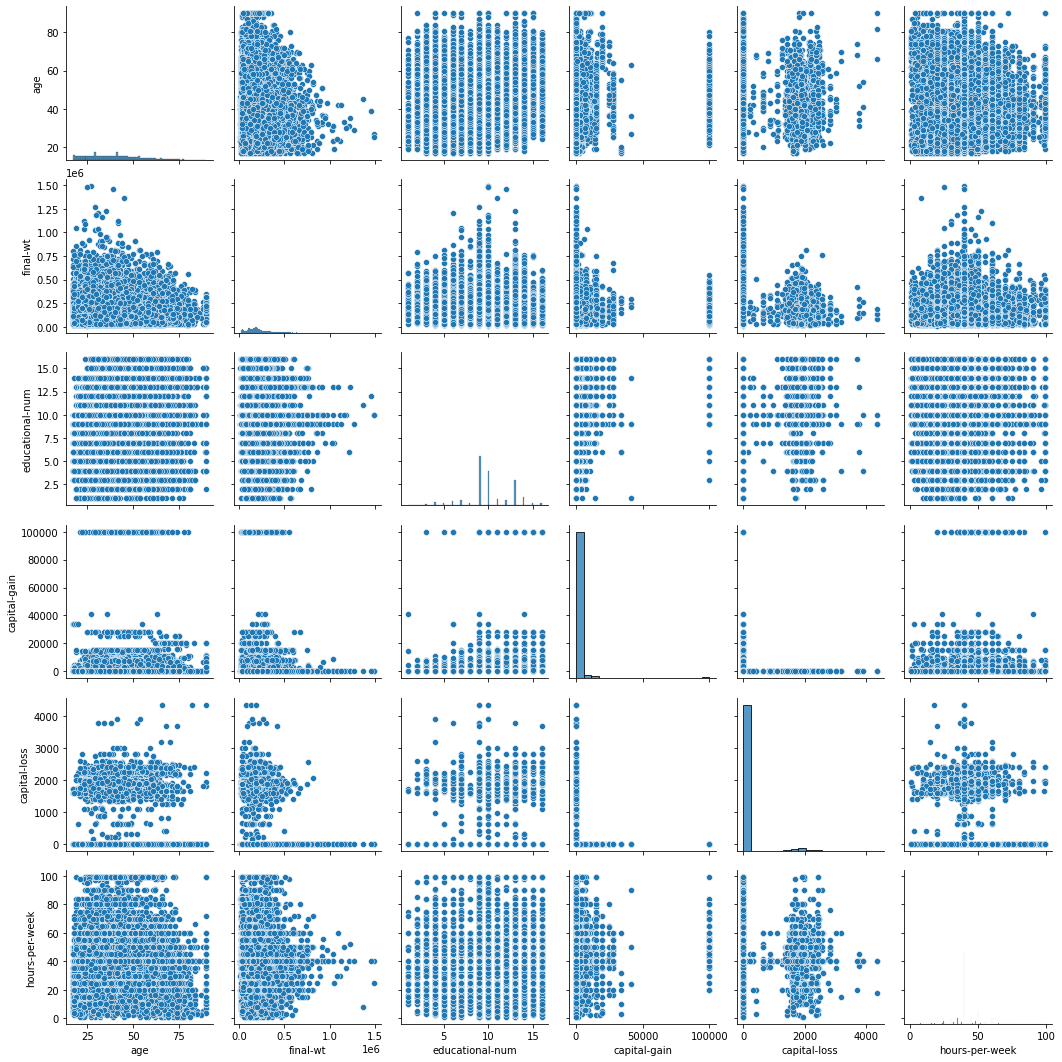

In [57]:
sns.pairplot(df[df.columns])


### Bar plot

In [58]:
print(cat_data.shape , num_data.shape)

(48842, 9) (48842, 6)


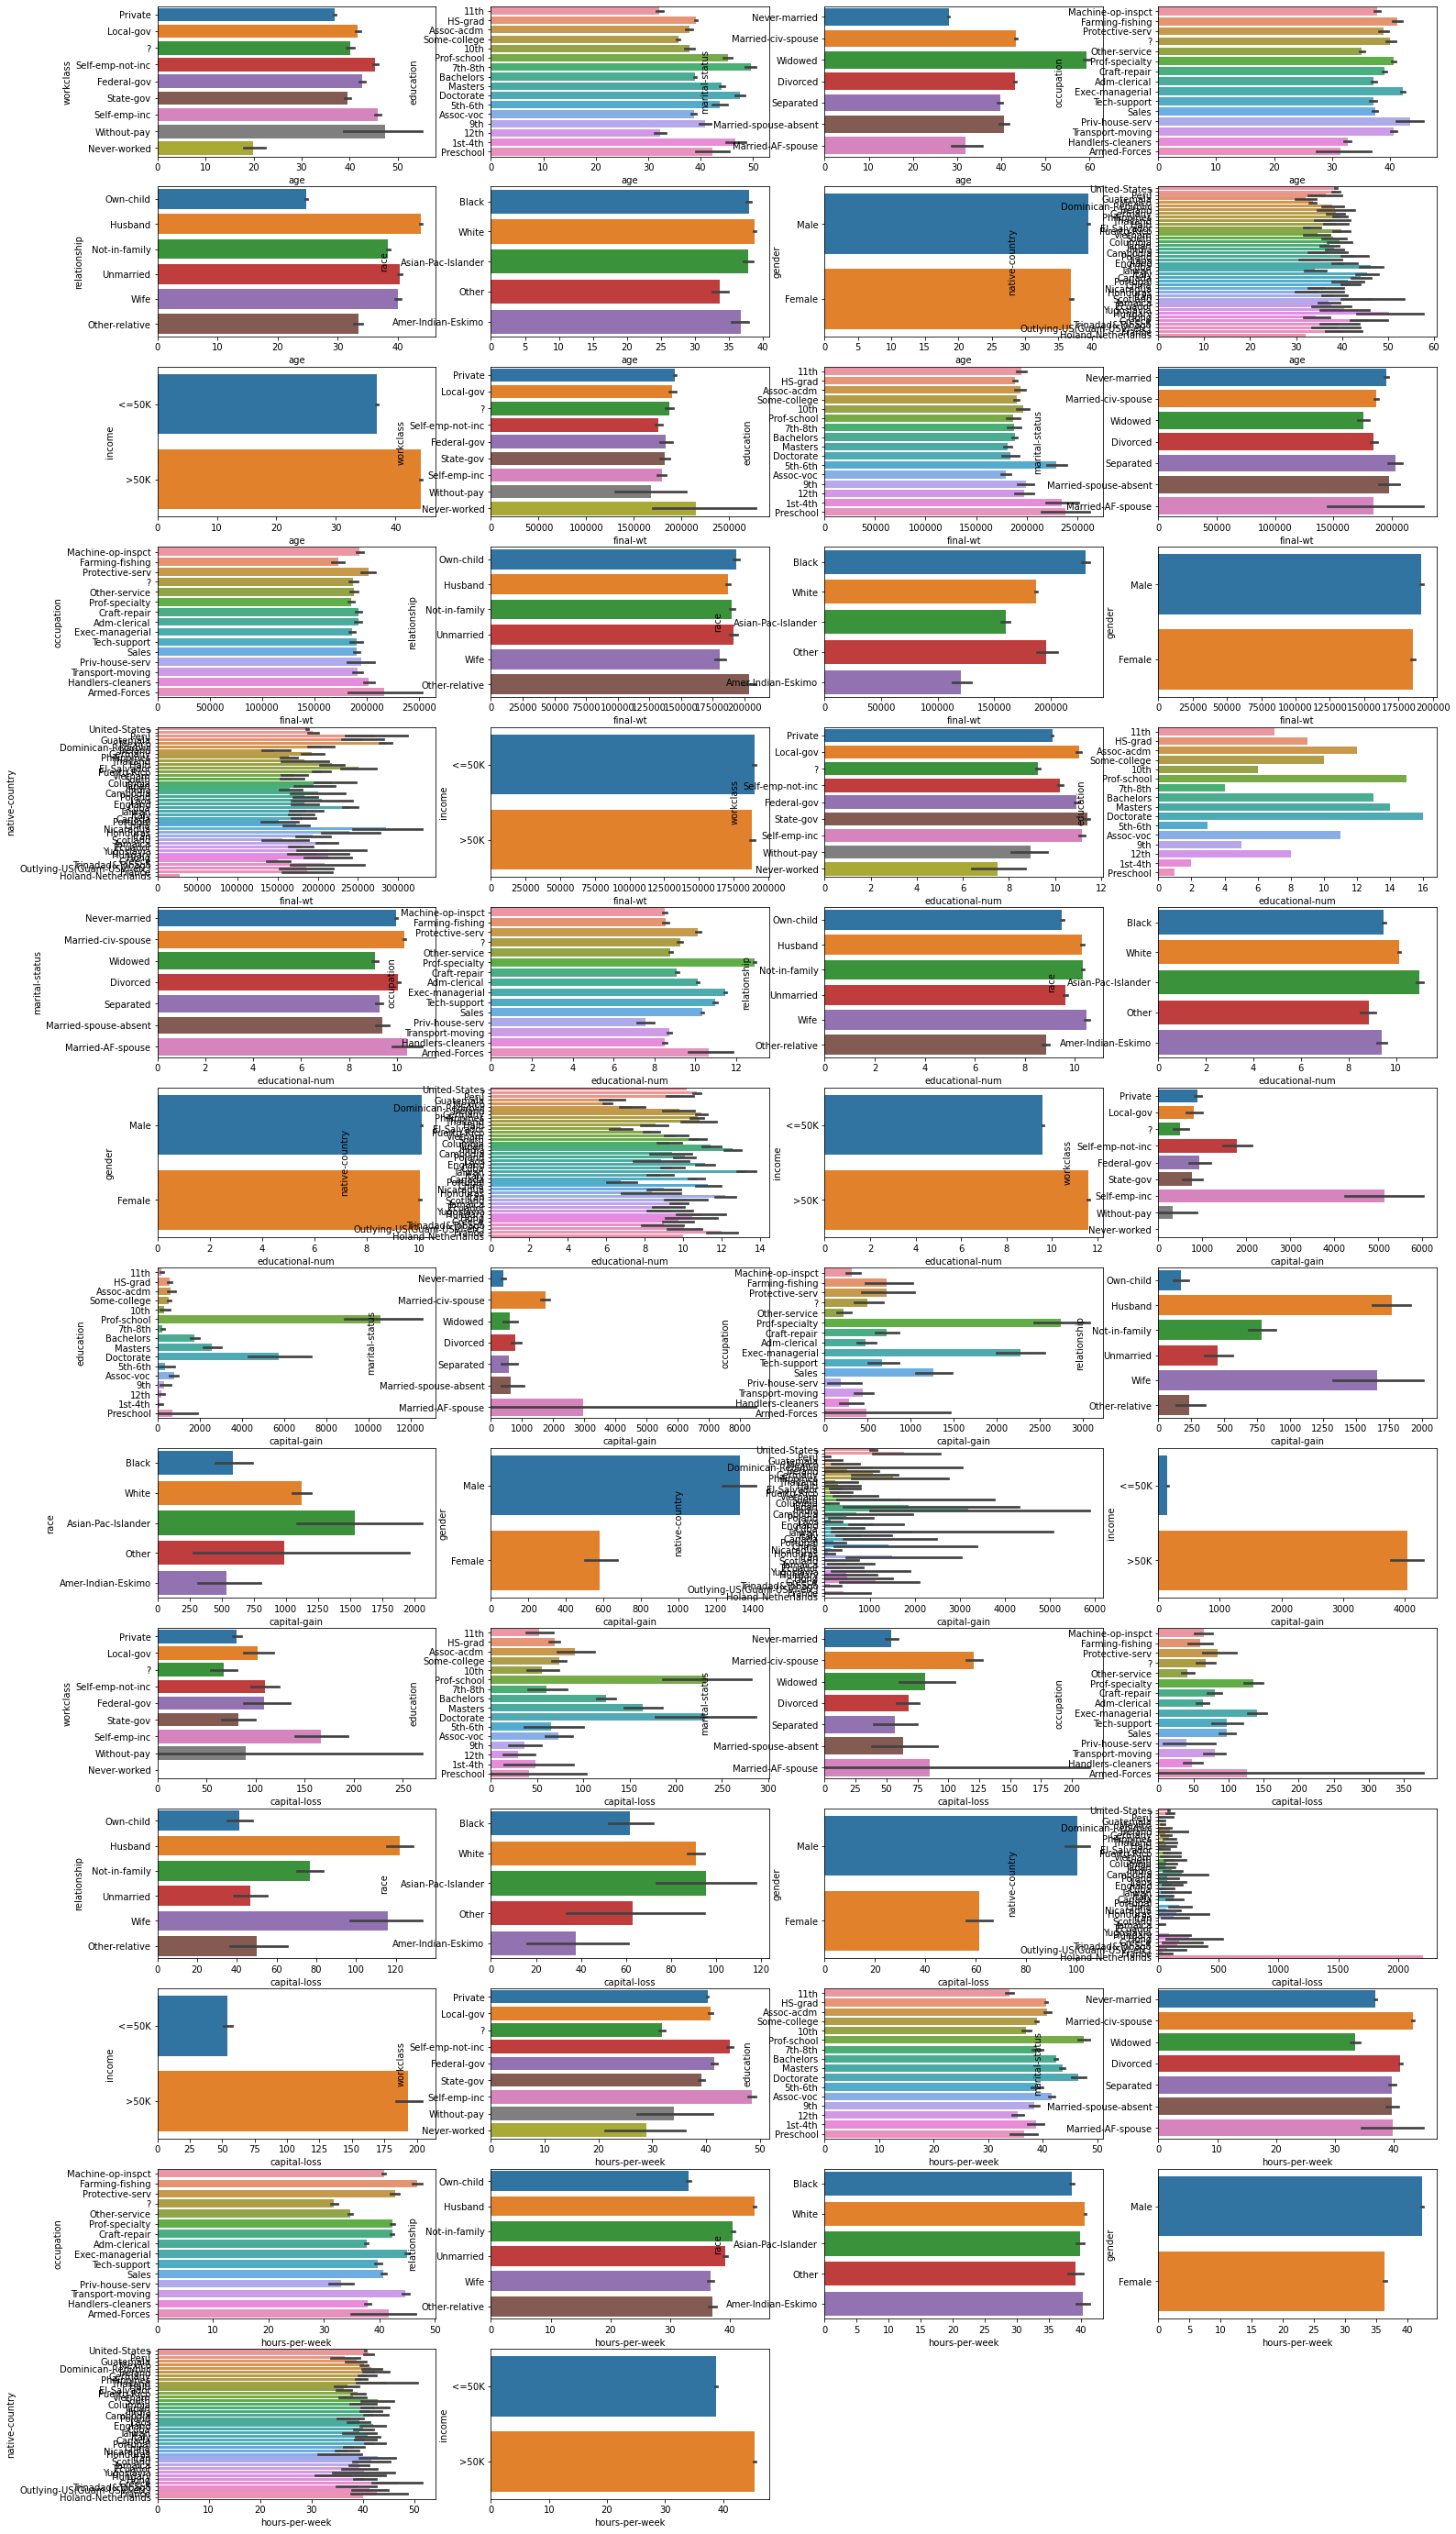

In [59]:
plt.subplots(figsize=(25, 50))
count = 1 
for i in num_data.columns:   
    for j in cat_data.columns:
        plt.subplot(14, 4, count)
        sns.barplot(data=df, y=cat_data[j], x=num_data[i])
        count += 1
plt.show()


**Observation**:
- Male work more per week compared to female.
- People who work more hours make more money.
- People who are self employed, work more compared to other workclasses.
  

# Data Preprocessing

### Removing outliers and missing values of Numerical Features

IQR

In [60]:
def remove_outlier_IQR(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(
        df[field_name], 25) - iqr)].index, inplace=True)
    return df

In [61]:
# Removing ouliers from final-wt feature
df2 = remove_outlier_IQR(df,'final-wt')
df_final = remove_outlier_IQR(df2, 'hours-per-week')
df_final.shape

(36312, 15)

Boxplot

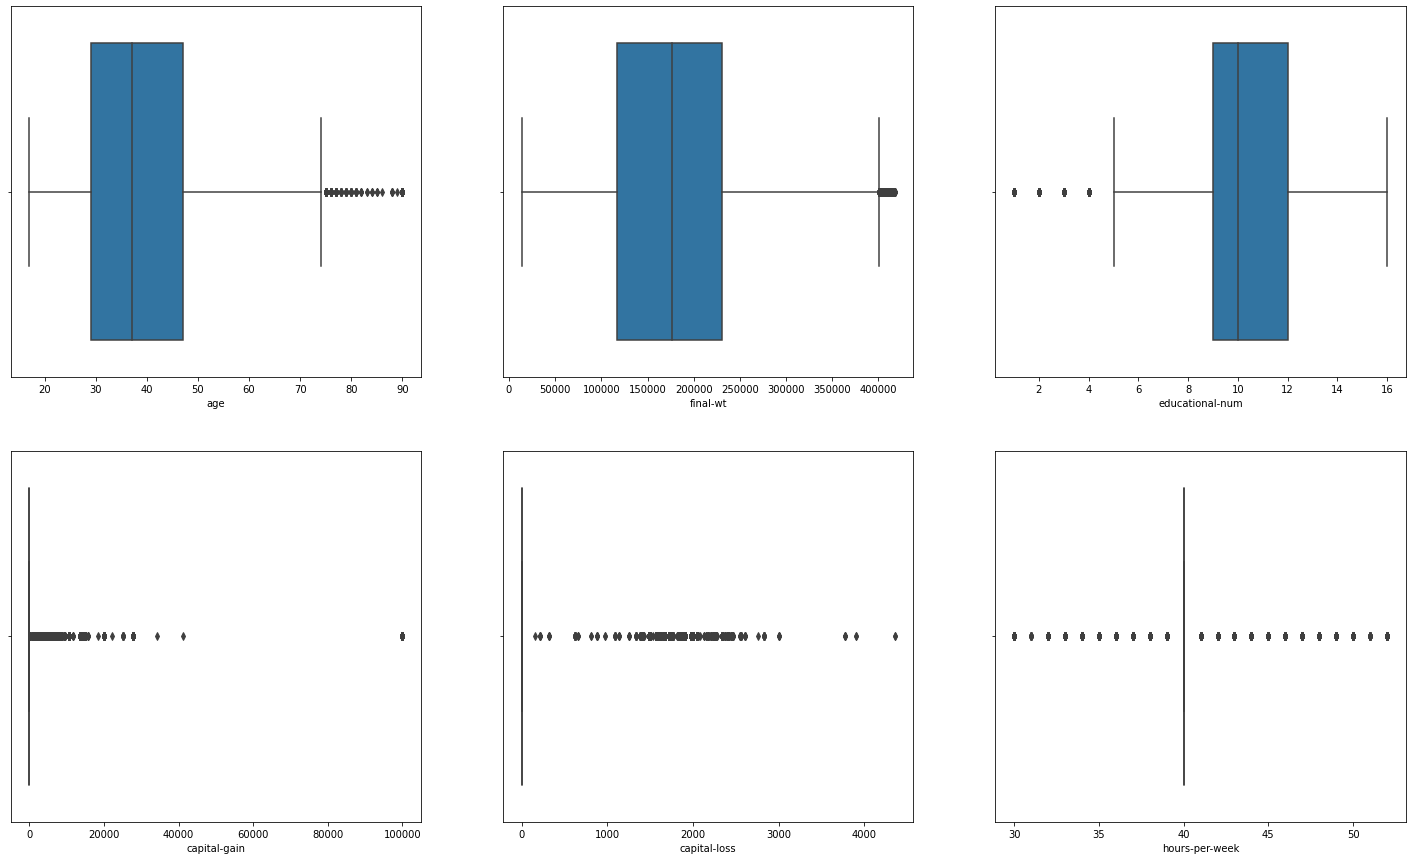

In [62]:
plt.subplots(figsize=(25, 15))
count = 1
for i in num_data.columns:
    plt.subplot(2, 3, count)
    sns.boxplot(x=df_final[i])
    count += 1
plt.show()

**hypothesis tests**

In [63]:
import scipy.stats as stats
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

### STATISTICS FOR DATA ANALYSIS

#### Is there a relationship between occupation and gender? (i.e. does the preference of occupation depend on the gender)


In [64]:
df['gender'].value_counts()

Male      24552
Female    11760
Name: gender, dtype: int64

In [65]:
df['occupation'].value_counts()

Craft-repair         5155
Prof-specialty       4625
Exec-managerial      4573
Adm-clerical         4508
Sales                3699
Other-service        3229
Machine-op-inspct    2691
Transport-moving     1689
?                    1625
Handlers-cleaners    1572
Tech-support         1173
Farming-fishing       871
Protective-serv       757
Priv-house-serv       132
Armed-Forces           13
Name: occupation, dtype: int64

- NULL HYPOTHESIS : H0 THERE ARE INDEPENDENT

- ALTERNATIVE HYPOTHESIS : H1 THERE ARE DEPENDENT

In [66]:
# Step - 2 => Looking at the freqency distribution

pd.crosstab(df.occupation, df.gender, margins=True)

gender,Female,Male,All
occupation,,,
?,706,919,1625
Adm-clerical,2993,1515,4508
Armed-Forces,0,13,13
Craft-repair,276,4879,5155
Exec-managerial,1415,3158,4573
Farming-fishing,65,806,871
Handlers-cleaners,189,1383,1572
Machine-op-inspct,707,1984,2691
Other-service,1731,1498,3229


In [67]:
# These are the observed frequencies

observed = pd.crosstab(df.occupation, df.gender)

observed

gender,Female,Male
occupation,,
?,706,919
Adm-clerical,2993,1515
Armed-Forces,0,13
Craft-repair,276,4879
Exec-managerial,1415,3158
Farming-fishing,65,806
Handlers-cleaners,189,1383
Machine-op-inspct,707,1984
Other-service,1731,1498


In [68]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(6432.741815787036, 0.0, 14, array([[ 526.27230668, 1098.72769332],
        [1459.96034369, 3048.03965631],
        [   4.21017845,    8.78982155],
        [1669.49768672, 3485.50231328],
        [1481.01123596, 3091.98876404],
        [ 282.08195638,  588.91804362],
        [ 509.10773298, 1062.89226702],
        [ 871.50693985, 1819.49306015],
        [1045.74355585, 2183.25644415],
        [  42.7495043 ,   89.2504957 ],
        [1497.85194977, 3127.14805023],
        [ 245.16192994,  511.83807006],
        [1197.95769993, 2501.04230007],
        [ 379.88764045,  793.11235955],
        [ 546.99933906, 1142.00066094]]))

In [69]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
degree_of_freedom = chi2_contingency(observed)[2]

In [70]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, degree_of_freedom)

chi2_critical

21.064144212997064

In [71]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [72]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


#### Is there a relationship between gender and income?

In [73]:
df['gender'].value_counts()

Male      24552
Female    11760
Name: gender, dtype: int64

In [74]:
df['income'].value_counts()

<=50K    27434
>50K      8878
Name: income, dtype: int64

- NULL HYPOTHESIS : H0 THERE ARE INDEPENDENT

- ALTERNATIVE HYPOTHESIS : H1 THERE ARE DEPENDENT

In [75]:
# Step - 2 => Looking at the freqency distribution

pd.crosstab(df.income, df.gender, margins=True)

gender,Female,Male,All
income,,,
<=50K,10402,17032,27434
>50K,1358,7520,8878
All,11760,24552,36312


In [76]:
# These are the observed frequencies

observed = pd.crosstab(df.income, df.gender)

observed

gender,Female,Male
income,,
<=50K,10402,17032
>50K,1358,7520


In [77]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(1566.2729918237903, 0.0, 1, array([[ 8884.77197621, 18549.22802379],
        [ 2875.22802379,  6002.77197621]]))

In [78]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat1 = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
degree_of_freedom = chi2_contingency(observed)[2]

In [79]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical1 = chi2.ppf(1 - alpha, degree_of_freedom)

chi2_critical1

2.705543454095404

In [80]:
if(chi2_test_stat1 > chi2_critical1):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [81]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


### Dealing with Categorical features

In [83]:

df_final = df_final.replace({'?': 'unknown'})


In [84]:
cat_df = df_final.select_dtypes(exclude=[np.number, np.datetime64])
num_df = df_final.select_dtypes(exclude=[np.object, np.datetime64])


In [85]:
cat_df.head()


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,unknown,Some-college,Never-married,unknown,Own-child,White,Female,United-States,<=50K


In [86]:
cat_df = pd.get_dummies(cat_df)
cat_df.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unknown,education_10th,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_unknown,income_<=50K,income_>50K
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


####**Conclusion of EDA**

1. It's interesting that there are categories that with exactly the same set of inputs expects to predict different income classes. There are no available features that can differentiate between these income classes.

2. Probably in the real world application we can use the final_weight variable in order to make fuzzy class from the income classes. For example, categories that don't have mixed income classes will be marked with 0 and 1, but other categories can be converted to the continuos probability. Let say 100 people have income <=50K, and 900 have income >50K (for exactly the same set of features) than we can convert income class to 0.9.

### Data preparation for training

In [87]:
data = pd.concat([cat_df,num_df],axis=1)
data.shape

(36312, 110)

### Splitting the dataset for training

In [88]:
from sklearn.model_selection import train_test_split

X  = data.drop(columns=['income_<=50K', 'income_>50K'])
y = data['income_<=50K']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
print("X train shape: {} and y train shape: {}".format(
    X_train.shape, y_train.shape))
print("X test shape: {} and y test shape: {}".format(X_test.shape, y_test.shape))


X train shape: (25418, 108) and y train shape: (25418,)
X test shape: (10894, 108) and y test shape: (10894,)


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X1 = data.drop(columns=['income_<=50K', 'income_>50K'])
y1 = data['income_<=50K']

# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X1)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    scaled_df, y1, test_size=0.3)
print("X1 train shape: {} and y1 train shape: {}".format(
    X1_train.shape, y1_train.shape))
print("X1 test shape: {} and y1 test shape: {}".format(X1_test.shape, y1_test.shape))


X1 train shape: (25418, 108) and y1 train shape: (25418,)
X1 test shape: (10894, 108) and y1 test shape: (10894,)


# Model Training

## Random Forest Classifier

In [90]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(random_state=10)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.62      0.66      2684
           1       0.88      0.92      0.90      8210

    accuracy                           0.84     10894
   macro avg       0.80      0.77      0.78     10894
weighted avg       0.84      0.84      0.84     10894

[[1672 1012]
 [ 680 7530]]
0.844685147787773


In [91]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(random_state=10)
rfm.fit(X1_train, y1_train)
y1_pred = rfm.predict(X1_test)

print(metrics.classification_report(y1_test, y1_pred))
print(metrics.confusion_matrix(y1_test, y1_pred))
print(metrics.accuracy_score(y1_test, y1_pred))


              precision    recall  f1-score   support

           0       0.72      0.63      0.67      2690
           1       0.88      0.92      0.90      8204

    accuracy                           0.85     10894
   macro avg       0.80      0.77      0.79     10894
weighted avg       0.84      0.85      0.84     10894

[[1689 1001]
 [ 648 7556]]
0.8486322746465944


## Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.73      0.25      0.37      2684
           1       0.80      0.97      0.88      8210

    accuracy                           0.79     10894
   macro avg       0.76      0.61      0.62     10894
weighted avg       0.78      0.79      0.75     10894

[[ 673 2011]
 [ 255 7955]]
0.7919955939049018


In [93]:

logmodel = LogisticRegression()
logmodel.fit(X1_train, y1_train)
predictions = logmodel.predict(X1_test)
print(metrics.classification_report(y1_test, predictions))
print(metrics.confusion_matrix(y1_test, predictions))
print(metrics.accuracy_score(y1_test, predictions))


              precision    recall  f1-score   support

           0       0.73      0.59      0.65      2690
           1       0.87      0.93      0.90      8204

    accuracy                           0.85     10894
   macro avg       0.80      0.76      0.78     10894
weighted avg       0.84      0.85      0.84     10894

[[1584 1106]
 [ 573 7631]]
0.8458784652102075


## Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.64      0.31      0.42      2684
           1       0.81      0.94      0.87      8210

    accuracy                           0.79     10894
   macro avg       0.72      0.63      0.64     10894
weighted avg       0.77      0.79      0.76     10894

[[ 828 1856]
 [ 461 7749]]
0.7873141178630438


In [95]:
model = GaussianNB()
model.fit(X1_train, y1_train)
predictions = model.predict(X1_test)
print(metrics.classification_report(y1_test, predictions))
print(metrics.confusion_matrix(y1_test, predictions))
print(metrics.accuracy_score(y1_test, predictions))


              precision    recall  f1-score   support

           0       0.32      0.96      0.49      2690
           1       0.97      0.34      0.51      8204

    accuracy                           0.50     10894
   macro avg       0.65      0.65      0.50     10894
weighted avg       0.81      0.50      0.50     10894

[[2590  100]
 [5385 2819]]
0.49651184138057647


## Support Vector Machine (SVM)

In [96]:
from sklearn import svm
clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.47      0.07      0.13      2684
           1       0.76      0.97      0.86      8210

    accuracy                           0.75     10894
   macro avg       0.62      0.52      0.49     10894
weighted avg       0.69      0.75      0.68     10894

[[ 194 2490]
 [ 217 7993]]
0.7515145951900128


## K-Nearest Neighbours

In [97]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.28      0.39      2684
           1       0.80      0.95      0.87      8210

    accuracy                           0.78     10894
   macro avg       0.71      0.61      0.63     10894
weighted avg       0.76      0.78      0.75     10894

[[ 747 1937]
 [ 449 7761]]
0.7809803561593538


In [98]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X1_train, y1_train)
predictions = KNN.predict(X1_test)
print(metrics.classification_report(y1_test, predictions))
print(metrics.confusion_matrix(y1_test, predictions))
print(metrics.accuracy_score(y1_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.55      0.61      2690
           1       0.86      0.91      0.88      8204

    accuracy                           0.82     10894
   macro avg       0.76      0.73      0.75     10894
weighted avg       0.81      0.82      0.82     10894

[[1488 1202]
 [ 740 7464]]
0.8217367358178814


**model selection**

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [100]:
# list of models
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [101]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    

    'log_reg_hyperparameters': {
        
        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {
        
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100]
    }
}

In [102]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


Applying GridSearchCV

In [106]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [ ]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
---------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
